In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_iris

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression

from sklearn.metrics import mean_squared_error, roc_curve

# Model Training and Improvement
## Live Demos

In [3]:
house_attributes, prices = load_boston().data, load_boston().target

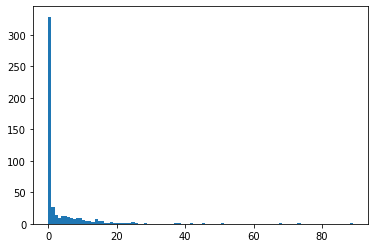

In [4]:
plt.hist(house_attributes[:, 0], bins = "fd")
plt.show()

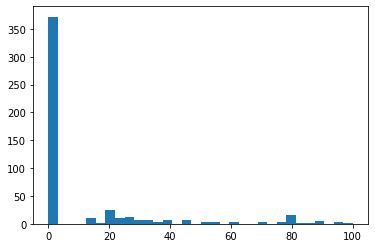

In [5]:
plt.hist(house_attributes[:, 1], bins = "fd")
plt.show()

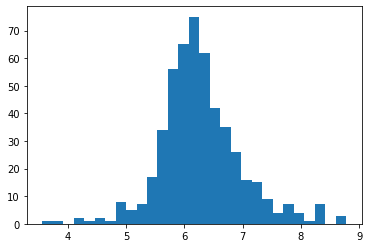

In [6]:
plt.hist(house_attributes[:, 5], bins = "fd")
plt.show()

In [7]:
scaler = MinMaxScaler()

In [8]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [9]:
house_linear_model = LinearRegression()

In [10]:
house_linear_model.fit(house_attributes_scaled, prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
house_linear_model.coef_

array([ -9.60975755,   4.64204584,   0.56083933,   2.68673382,
        -8.63457306,  19.88368651,   0.06721501, -16.22666104,
         7.03913802,  -6.46332721,  -8.95582398,   3.69282735,
       -19.01724361])

In [14]:
house_linear_model.score(house_attributes_scaled, prices)

0.7406426641094095

In [15]:
house_elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.2)

In [16]:
house_elastic_net.fit(house_attributes_scaled, prices)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
house_elastic_net.coef_

array([-0.97873356,  1.75189671, -2.34887534,  2.30256155, -1.73818704,
        5.61112211, -1.30728516, -0.99468276, -0.58740467, -2.4460063 ,
       -4.56635864,  2.07968869, -6.84804804])

In [18]:
house_elastic_net.score(house_attributes_scaled, prices)

0.5134818321500594

In [19]:
iris_data, iris_types = load_iris().data, load_iris().target

In [20]:
iris_data_scaled = MinMaxScaler().fit_transform(iris_data)

In [21]:
iris_model = LogisticRegression(C = 0.0000001)

In [22]:
iris_model.fit(iris_data_scaled, iris_types)

LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
iris_model.coef_

array([[-1.16295896e-06,  7.72219565e-07, -1.94575602e-06,
        -1.98610428e-06],
       [ 1.28703261e-07, -5.98609051e-07,  4.25422265e-07,
         2.63887981e-07],
       [ 1.03425570e-06, -1.73610514e-07,  1.52033375e-06,
         1.72221630e-06]])

In [24]:
iris_model_default = LogisticRegression()
iris_model_default.fit(iris_data_scaled, iris_types)
iris_model_default.coef_

array([[-1.40492627,  1.56002082, -2.86063347, -2.78713597],
       [ 0.26135757, -1.43723031,  0.41839556, -0.47843834],
       [ 1.1435687 , -0.12279052,  2.44223791,  3.2655743 ]])

In [108]:
iris_model.score(iris_data_scaled, iris_types)

0.36666666666666664

In [109]:
house_attributes_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [114]:
house_attributes_scaled_train, house_attributes_scaled_test, prices_train, prices_test = train_test_split(
    house_attributes_scaled, prices, train_size = 0.7)

In [115]:
house_attributes_scaled_train.shape

(354, 13)

In [116]:
house_attributes_scaled_test.shape

(152, 13)

In [117]:
prices_train.shape

(354,)

In [118]:
prices_test.shape

(152,)

In [119]:
house_lr = LinearRegression()

In [120]:
house_lr.fit(house_attributes_scaled_train, prices_train)

LinearRegression()

In [121]:
house_lr.coef_

array([-11.77660774,   6.0814825 ,   0.45005638,   2.38391018,
        -7.96132802,  15.27951442,  -0.27479783, -15.6331148 ,
         8.01951696,  -7.92566187,  -9.4947226 ,   3.29540888,
       -17.73384833])

In [122]:
house_lr.score(house_attributes_scaled_train, prices_train)

0.7274164283288873

In [123]:
house_lr.score(house_attributes_scaled_test, prices_test)

0.7450021252599642

In [125]:
mean_squared_error(prices_train, house_lr.predict(house_attributes_scaled_train))

22.24441341275139

In [126]:
mean_squared_error(prices_test, house_lr.predict(house_attributes_scaled_test))

22.9178452551194

In [128]:
test_price_predictions = house_lr.predict(house_attributes_scaled_test)

Text(0, 0.5, 'Predicted prices')

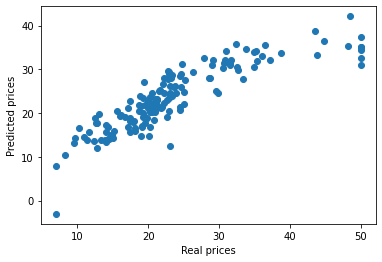

In [130]:
plt.scatter(prices_test, test_price_predictions)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")

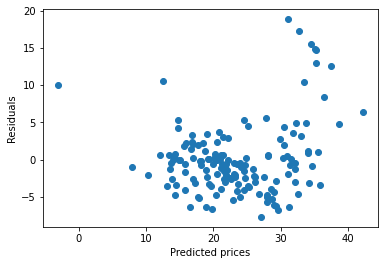

In [136]:
plt.scatter(test_price_predictions, prices_test - test_price_predictions)
plt.xlabel("Predicted prices")
plt.ylabel("Residuals")
plt.show()

In [142]:
parameters = {
    "alpha": [1e-3, 1e-2, 1e-1, 1],
    "l1_ratio": [0.01, 0.1, 0.5, 1, 2, 5],
    "fit_intercept": [True, False]
}

In [143]:
grid_search = GridSearchCV(ElasticNet(), param_grid = parameters, cv = 4)

In [144]:
grid_search.fit(house_attributes_scaled_train, prices_train)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 2.1959877584905665
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 2.0333999849056603
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 2.163004364661654
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.01, 0.1, 0.5, 1, 2, 5]})

In [145]:
grid_search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.01)

In [146]:
grid_search.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.01}

In [155]:
polynomial = PolynomialFeatures(degree = 2, interaction_only = True).fit(house_attributes_scaled_train)

In [156]:
house_attributes_poly_train = polynomial.transform(house_attributes_scaled_train)

In [157]:
house_attributes_poly_test = polynomial.transform(house_attributes_scaled_test)

In [164]:
parameters = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "l1_ratio": [0.01, 0.1, 1],
    "fit_intercept": [True, False]
}

In [165]:
grid_search = GridSearchCV(ElasticNet(), param_grid = parameters, cv = 4)

In [166]:
grid_search.fit(house_attributes_poly_train, prices_train)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1920.4717197170958, tolerance: 2.1959877584905665
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.5282570671625, tolerance: 2.0333999849056603
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1867.021108426085, tolerance: 2.163004364661654
  positive)
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to 

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01], 'fit_intercept': [True, False],
                         'l1_ratio': [0.01, 0.1]})

In [167]:
grid_search

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01], 'fit_intercept': [True, False],
                         'l1_ratio': [0.01, 0.1]})

In [168]:
grid_search.best_estimator_

ElasticNet(alpha=0.001, fit_intercept=False, l1_ratio=0.1)

In [169]:
grid_search.cv_results_

{'mean_fit_time': array([0.0244413 , 0.02194113, 0.02318799, 0.02318817, 0.02667868,
        0.02343714, 0.0239374 , 0.02343696]),
 'std_fit_time': array([0.00326868, 0.00211625, 0.00147504, 0.00369039, 0.00237848,
        0.00349024, 0.00373024, 0.00149661]),
 'mean_score_time': array([0.0002498 , 0.00074804, 0.00049859, 0.00049859, 0.00024927,
        0.00074834, 0.00099611, 0.00099766]),
 'std_score_time': array([4.32671603e-04, 4.31880120e-04, 8.63588155e-04, 4.98593032e-04,
        4.31742458e-04, 4.32052272e-04, 1.33812096e-06, 7.05369747e-04]),
 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
